In [ ]:
!ls {data_location}

## Predictability of Features and Samples

In this notebook we'll ask a basic question:

How predictable are different features and samples in general?

PCA makes the best possible orthogonal representation of a dataset using up to n different linear components, so it's the platonic ideal of how well a dataset is represented by a multivariate normal distribution with some covariance matrix. 

So let's ask ourselves, how much information can we recover from various scRNAseq datasests if we project them into a lower-dimensional subspace using PCA and then recover them? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

import pickle 

data_location = "../../data/aging_brain/"

young = pickle.load(open(data_location + "aging_brain_young.pickle",mode='rb'))
old = pickle.load(open(data_location + "aging_brain_old.pickle",mode='rb'))

filtered = pickle.load(open(data_location + "aging_brain_filtered.pickle",mode='rb'))

batch_encoding = np.loadtxt(data_location + 'aging_batch_encoding.tsv')
batch_encoding = batch_encoding.astype(dtype=bool)

young_mask = np.zeros(37069,dtype=bool)
old_mask = np.zeros(37069,dtype=bool)

young_mask[:young.shape[0]] = True
old_mask[young.shape[0]:] = True

# young = pickle.load(open(data_location + "aging_brain_young.pickle",mode='rb'))
# old = pickle.load(open(data_location + "aging_brain_old.pickle",mode='rb'))

# filter_mask = np.loadtxt(data_location + "filtered_feature_mask.txt").astype(dtype=bool)

# young_filtered = young.X.T[filter_mask].T
# old_filtered = old.X.T[filter_mask].T

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=25).fit(young.X)
transformed = model.transform(young.X)
recovered = model.inverse_transform(transformed)

centered = young.X - np.mean(young.X,axis=0)
null_squared_residual = np.power(centered,2)

pca_residual = young.X - recovered
pca_squared_residual = np.power(pca_residual,2)

pca_recovered_per_sample = np.sum(pca_squared_residual,axis=1)
pca_recovered_fraction_per_sample = np.sum(pca_squared_residual,axis=1) / np.sum(null_squared_residual,axis=1)
print(np.sum(null_squared_residual))
print(np.sum(pca_squared_residual))

print(f"Remaining variance:{(np.sum(pca_squared_residual) / np.sum(null_squared_residual))}")

In [ ]:
from sklearn.decomposition import PCA

centered = young.X - np.mean(young.X,axis=0)
null_squared_residual = np.power(centered,2)

fractions = []

for i in range(100):
    model = PCA(n_components=i).fit(young.X)
    transformed = model.transform(young.X)
    recovered = model.inverse_transform(transformed)

    recovered_residual = young.X - recovered
    recovered_squared_residual = np.power(recovered_residual,2)

    pca_recovered_per_sample = np.sum(recovered_squared_residual,axis=1)
    pca_recovered_fraction_per_sample = np.sum(recovered_squared_residual,axis=1) / np.sum(null_squared_residual,axis=1)
#     print(np.sum(null_squared_residual))
#     print(np.sum(recovered_squared_residual))

    fraction = np.sum(recovered_squared_residual) / np.sum(null_squared_residual)
    fractions.append(fraction)
    print(f"{i}: Remaining variance:{fraction}")

# centered = young_filtered - np.mean(young_filtered,axis=0)
# null_squared_residual = np.power(centered,2)

# fractions = []

# for i in range(351):
#     model = PCA(n_components=i).fit(young_filtered)
#     transformed = model.transform(young_filtered)
#     recovered = model.inverse_transform(transformed)

#     recovered_residual = young_filtered - recovered
#     recovered_squared_residual = np.power(recovered_residual,2)

#     pca_recovered_per_sample = np.sum(recovered_squared_residual,axis=1)
#     pca_recovered_fraction_per_sample = np.sum(recovered_squared_residual,axis=1) / np.sum(null_squared_residual,axis=1)
# #     print(np.sum(null_squared_residual))
# #     print(np.sum(recovered_squared_residual))

#     fraction = np.sum(recovered_squared_residual) / np.sum(null_squared_residual)
#     fractions.append(fraction)
#     print(f"{i}: Remaining variance:{fraction}")

0: Remaining variance:1.0
1: Remaining variance:0.8692488670349121
2: Remaining variance:0.758476972579956
3: Remaining variance:0.6877858638763428
4: Remaining variance:0.6321733593940735
5: Remaining variance:0.6113985180854797
6: Remaining variance:0.5953540205955505
7: Remaining variance:0.5854095816612244
8: Remaining variance:0.5772488117218018
9: Remaining variance:0.5703732967376709
10: Remaining variance:0.5647286772727966
11: Remaining variance:0.5592596530914307
12: Remaining variance:0.5543373227119446
13: Remaining variance:0.5496830344200134
14: Remaining variance:0.5452210307121277
15: Remaining variance:0.5414120554924011
16: Remaining variance:0.5379151105880737
17: Remaining variance:0.534825325012207
18: Remaining variance:0.5319852828979492
19: Remaining variance:0.5294577479362488
20: Remaining variance:0.5269657373428345
21: Remaining variance:0.5245851874351501
22: Remaining variance:0.5222638845443726
23: Remaining variance:0.5200920104980469
24: Remaining varia

KeyboardInterrupt: 

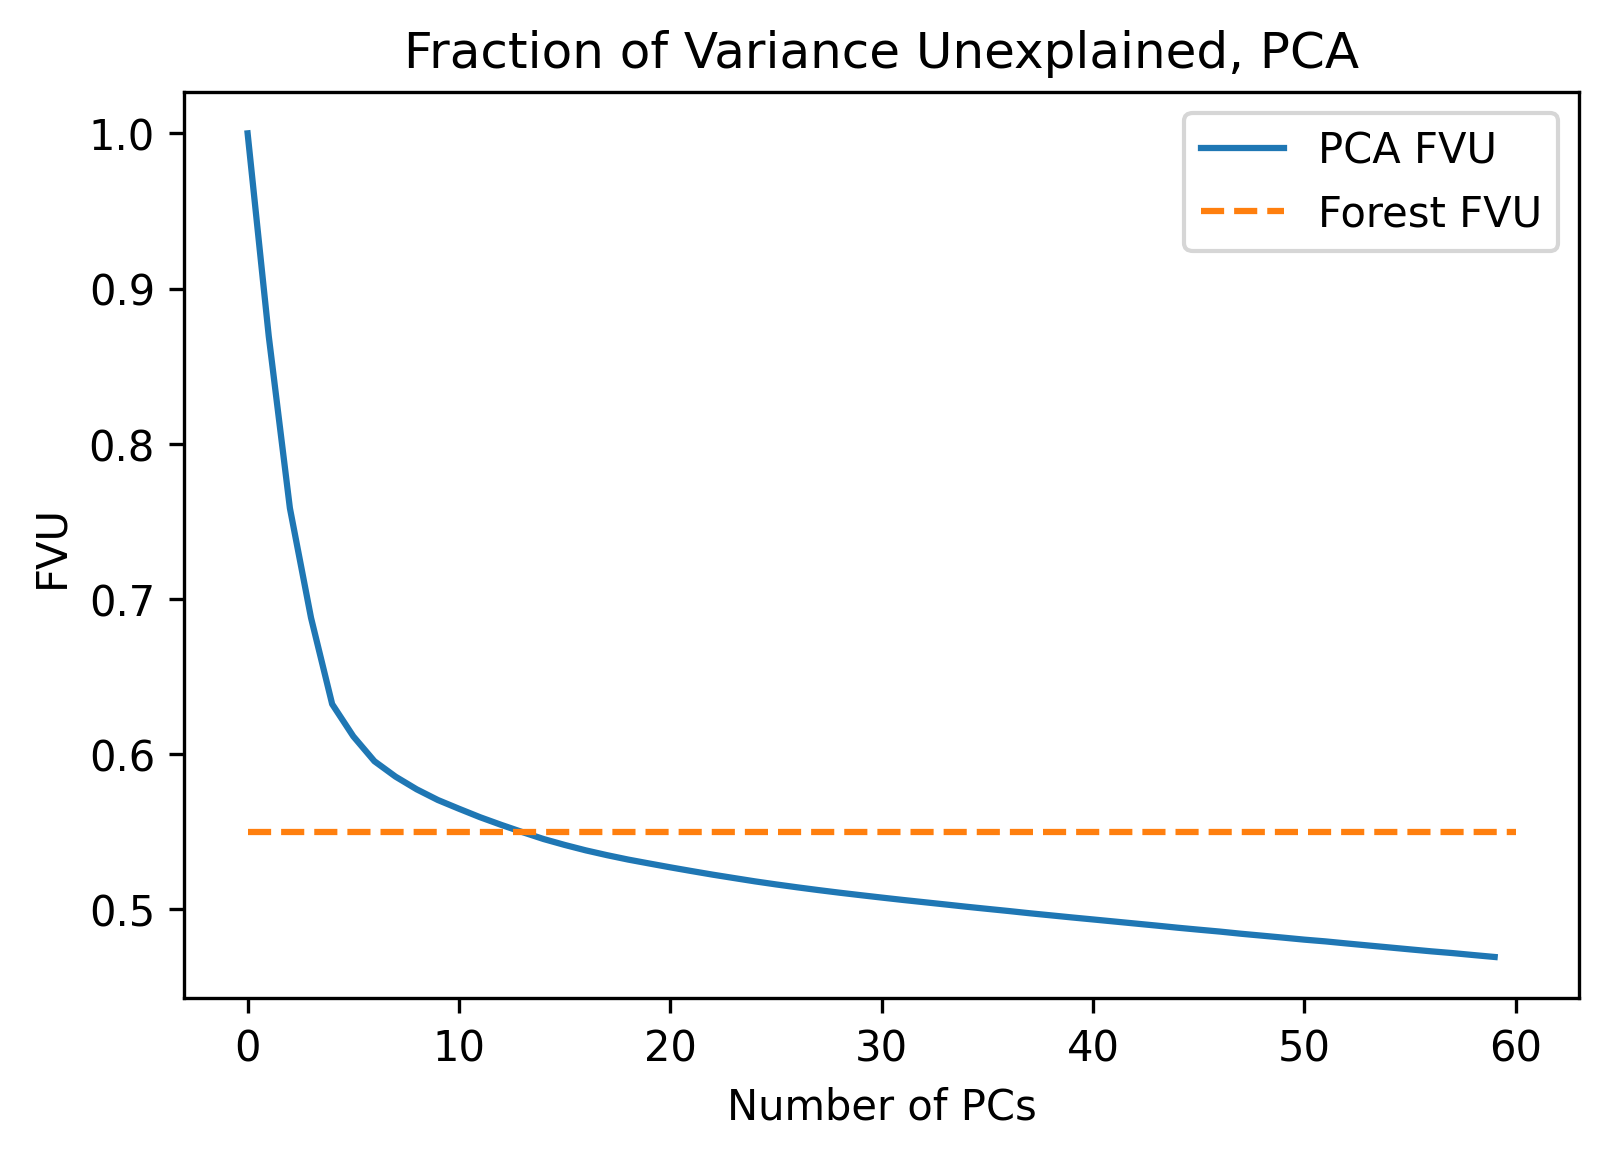

No handles with labels found to put in legend.


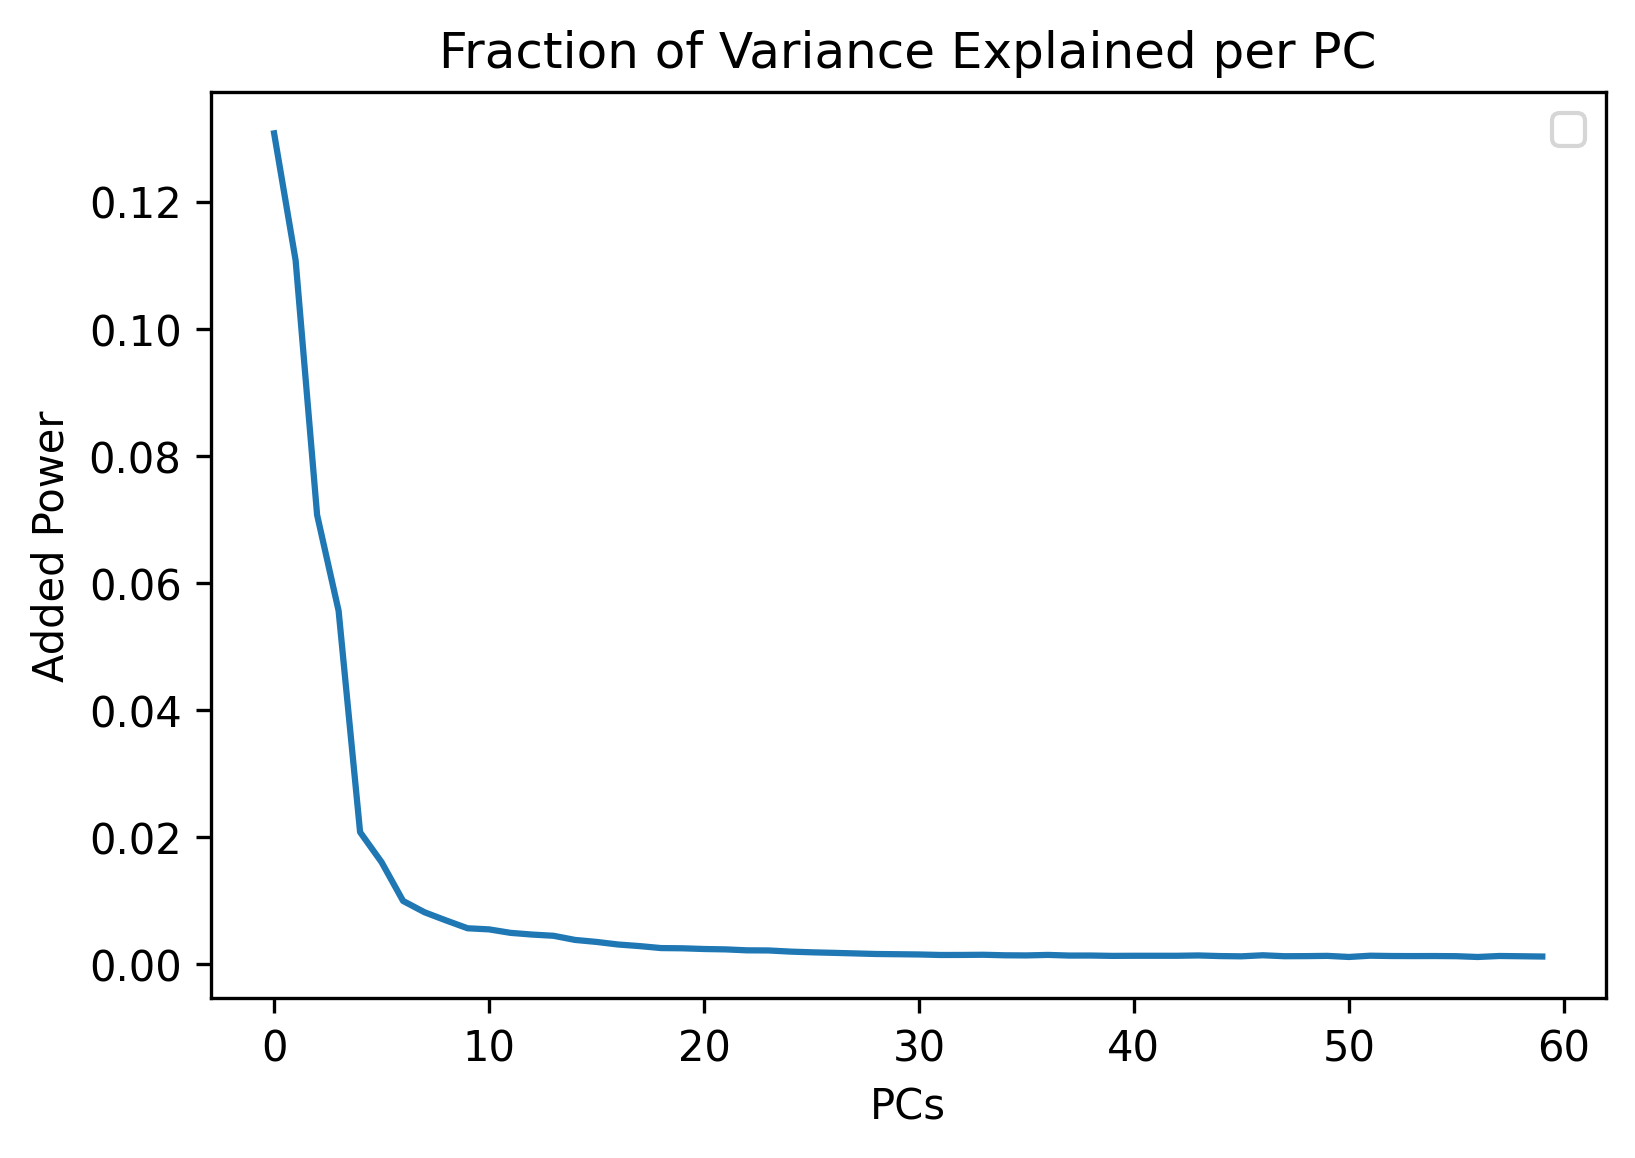

In [ ]:
plt.figure()
plt.title("Fraction of Variance Unexplained, PCA")
plt.plot(fractions[:60],label="PCA FVU")
plt.plot([0,60],[.55,.55],"--",label="Forest FVU")
plt.xlabel("Number of PCs")
plt.ylabel("FVU")
plt.legend()
plt.show()

fractions = np.array(fractions)
diff = fractions[:-1]-fractions[1:]

plt.figure()a
plt.title("Fraction of Variance Explained per PC")
plt.plot(diff[:60])
plt.xlabel("PCs")
plt.ylabel("Added Power")
plt.legend()
plt.show()


In [ ]:
# for i,pc in enumerate(transformed.T):
#     plt.figure()
#     plt.title(i)
#     plt.scatter(*young.obsm["X_umap"].T,c=pc,s=3,alpha=.4,cmap='bwr',vmin=-20,vmax=20)
#     plt.colorbar()
#     plt.show()

# f1 = "Ctsd"
# f2 = "H2-Ab1"

# f1_index = forest.truth_dictionary.feature_dictionary[f1]
# f2_index = forest.truth_dictionary.feature_dictionary[f2]

# for i,component in enumerate(model.components_):
#     print(f"{i}: {f1}:{component[f1_index]},{f2}:{component[f2_index]}")

# plt.figure()
# plt.scatter(model.components_[:,f1_index],model.components_[:,f2_index])
# plt.plot([.2,-.2],[-.2,.2],color='red')
# plt.show()
    

In [ ]:
feature_null = np.sum(null_squared_residual,axis=0) + 1
feature_absolute_null = np.sum(np.abs(centered),axis=0) + 1
sample_null = np.sum(null_squared_residual,axis=1) + 1
sample_absolute_null = np.sum(np.abs(centered),axis=1) + 1

pca_feature_error = np.sum(pca_squared_residual,axis=0) + 1
pca_feature_remaining = pca_feature_error/feature_null

pca_absolute_feature_error = np.sum(recovered_residual)

pca_sample_error = np.sum(pca_squared_residual,axis=1) + 1
pca_sample_remaining = pca_sample_error / sample_null


plt.figure()
plt.title("Fraction of Variance Unexplained, Per Feature")
plt.hist(pca_feature_remaining,bins=50)
plt.ylabel("Frequency")
plt.xlabel("Fraction of Variance Unexplained")
plt.show()

plt.figure()
plt.title("Fraction of Variance Unexplained, Per Sample")
plt.hist(pca_sample_remaining,bins=50)
plt.ylabel("Frequency")
plt.xlabel("Fraction of Variance Unexplained")
plt.show()

print(f"PCA Variance Unexplained:{np.sum(recovered_squared_residual)/np.sum(null_squared_residual)}")

In [ ]:
# SUM OF ABSOLUTE DEVIATIONS VERSION

# feature_null = np.sum(np.abs(centered),axis=0) + 1
# sample_null = np.sum(np.abs(centered),axis=1) + 1

# pca_feature_error = np.sum(np.abs(recovered_residual),axis=0) + 1
# pca_feature_remaining = pca_feature_error/feature_null

# pca_sample_error = np.sum(np.abs(recovered_residual),axis=1) + 1
# pca_sample_remaining = pca_sample_error / sample_null


# plt.figure()
# plt.title("Fraction of Variance Unexplained, Per Feature")
# plt.hist(pca_feature_remaining,bins=50)
# plt.ylabel("Frequency")
# plt.xlabel("Fraction of Variance Unexplained")
# plt.show()

# plt.figure()
# plt.title("Fraction of Variance Unexplained, Per Sample")
# plt.hist(pca_sample_remaining,bins=50)
# plt.ylabel("Frequency")
# plt.xlabel("Fraction of Variance Unexplained")
# plt.show()

In [9]:
!ls ../../data/aging_brain/

In [11]:

# import sys
# sys.path.append('../')
# from rusty_axe import tree_reader as tr 
from rusty_axe import lumberjack

cv_forest = lumberjack.fit(
    young.X,
    header=young.var_names,
    trees=100,
    ifs=700,
    ofs=700,
    ss=300,
    depth=8,
    leaves=100,
    dispersion_mode='ssme',
    sfr=0,
    standardize = 'true',
    norm='l1',
    reduction = 10,
    p=8,
    reduce_input='true',
    reduce_output='true'
)
cv_forest.set_cache(True)
cv_forest.backup(data_location + "pca_comparison_forest")

# started at 5:50

Setting context
Input:(16028, 2000)
Output:(16028, 2000)
Generating trees
Running /Users/bbrener1/miniconda3/lib/python3.7/site-packages/rusty_axe/bin/rf_5
Command: /Users/bbrener1/miniconda3/lib/python3.7/site-packages/rusty_axe/bin/rf_5 -ic /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/input.counts -oc /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/output.counts -o /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp -auto -ifh /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.ifh -ofh /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.ofh -trees 100 -ifs 700 -ofs 700 -ss 300 -depth 8 -leaves 100 -dispersion_mode ssme -sfr 0 -standardize true -norm l1 -reduction 10 -p 8 -reduce_input true -reduce_output true
Read parameters

0 0 1.8931357860565186 0 0 0 2.507997751235962 0 0 0 0
100

0 0 0 0 0 0 0 0 0 0 200
300

0 0 0 0 0 0 0 0 0 0 400
500

0 0 0 0 0 0 0 0 0 0 600
700

0 0 0 0 2.0017569065093994 0 0 0 0 0 800
900



Reading header: /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.ifh
Read 2000 lines
Reading header: /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.ofh
Read 2000 lines
Computing tree 6
Computing tree 7
Computing tree 25
Computing tree 10
Computing tree 12
Computing tree 0
Computing tree 50
Computing tree 9
Computing tree 1
Computing tree 3
Computing tree 8
Computing tree 11
Computing tree 13
Computing tree 51
Computing tree 26
Computing tree 75
Computing tree 4
Computing tree 2
Computing tree 5
Computing tree 14
Computing tree 76
Computing tree 62
Computing tree 27
Computing tree 52
Computing tree 87
Computing tree 93
Computing tree 15
Computing tree 90
Computing tree 77
Computing tree 28
Computing tree 63
Computing tree 53
Computing tree 91
Computing tree 16
Computing tree 88
Computing tree 94
Computing tree 78
Computing tree 29
Computing tree 54
Computing tree 64
Computing tree 92
Computing tree 17
Computing tree 95
Computing tree 79
Computing tree 8

Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_48.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_49.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_5.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_50.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_51.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_52.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_53.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_54.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_55.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_56.compact
Loading /var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmp9e8fvi9m/tmp.tree_57.compact
Loading /var/folders/_

In [8]:
import sys
# sys.path.append('/localscratch/bbrener1/rusty_forest_v3/src')
sys.path.append('../../')
import rusty_axe.lumberjack as lumberjack

data_location = "../../data/aging_brain/"

forest = lumberjack.load(data_location + 'selection_forest')
forest.arguments

FileNotFoundError: [Errno 2] No such file or directory: '../../data/aging_brain/scanpy_cmp_aging_brain_true_l1'

In [ ]:
forest.self_prediction = forest.predict(forest.output)
forest.self_prediction.prediction_report()


In [ ]:
forest_residuals = forest.self_prediction.residuals()

In [ ]:
forest_squared_residuals = np.power(forest_residuals,2)

forest_feature_error = np.sum(forest_squared_residuals,axis=0) + 1
forest_feature_remaining = forest_feature_error/feature_null

forest_sample_error = np.sum(forest_squared_residuals,axis=1) + 1
forest_sample_remaining = forest_sample_error/sample_null


plt.figure()
plt.title("Fraction of Variance Unexplained, Per Feature")
plt.hist(forest_feature_remaining,bins=50)
plt.ylabel("Frequency")
plt.xlabel("Fraction of Variance Unexplained")
plt.show()

plt.figure()
plt.title("Fraction of Variance Unexplained, Per Sample")
plt.hist(forest_sample_remaining,bins=50)
plt.ylabel("Frequency")
plt.xlabel("Fraction of Variance Unexplained")
plt.show()

# print(f"Forest Variance Unexplained:{np.sum(forest_squared_residuals)/np.sum(null_squared_residual)}")


# delta_sort = np.argsort(pca_feature_remaining-forest_feature_remaining)

# print(f"PCA best:{forest.output_features[delta_sort[:20]]}")
# print(f"Forest best:{forest.output_features[delta_sort[-20:]]}")

# for fb in delta_sort[-20:]:
#     print(f"Forest best: {forest.output_features[fb]}")
#     print(f"Forest: {forest_feature_remaining[fb]}")
#     print(f"PCA:{pca_feature_remaining[fb]}")

# ctsd_index = forest.truth_dictionary.feature_dictionary["Ctsd"]

# print(forest_feature_remaining[ctsd_index])
# print(pca_feature_remaining[ctsd_index])

feature_mean = np.mean(young.X,axis=0)
feature_mean.shape

sample_mean = np.mean(young.X,axis=1)

# h2_index = forest.truth_dictionary.feature_dictionary["H2-Ab1"]

# plt.figure()
# plt.scatter(*forest.coordinates().T,c=recovered_residual[:,h2_index],s=2,cmap='bwr')
# plt.colorbar()
# plt.show()

# Cat 1a,:  S100a9, S100a8, Wfdc21,Retnlg, Lcn2,Ngp,Camp,Mmp8,Hp, Ltf, Slpi, Trem3
# Cat 1b: Plac8, 
# Cat 1c: H2-Eb1,H2-Aa,H2-Ab1,


# Cat 2a: Slc22a6,Slc6a13,Fmod

# Cat3: Myoc

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Fraction of Variance Unexplained Per Feature, Forest Vs PCA")
plt.scatter(pca_feature_remaining,forest_feature_remaining,s=3,c=feature_mean)
plt.colorbar(label="Mean Expression")
plt.plot([0,1],[0,1],color='red')
plt.xlabel("PCA FVU")
plt.ylabel("Forest FVU")
plt.show()

# plt.figure(figsize=(4,4))
# plt.title("Fraction of Variance Unexplained Per Sample, Forest Vs PCA")
# plt.scatter(pca_sample_remaining,forest_sample_remaining,s=3,c=sample_mean)
# plt.plot([0,1],[0,1],color='red')
# plt.xlabel("PCA FVU")
# plt.ylabel("Forest FVU")
# plt.show()


In [ ]:
plt.figure()
plt.title("Forest Error Vs PCA Error")
plt.scatter(*young.obsm["X_umap"].T,s=2,c=forest_sample_remaining-pca_sample_remaining,cmap='seismic',vmin=-.5,vmax=.5)
plt.colorbar(label="Forest FVU - PCA FVU")
plt.show()

In [ ]:
gene = "Hp"
gene_index = forest.truth_dictionary.feature_dictionary[gene]

print(forest_feature_remaining[gene_index])
print(pca_feature_remaining[gene_index])

In [ ]:
plt.figure()
plt.scatter(forest_squared_residuals.flatten(),pca_squared_residual.flatten(),s=1,alpha=.3)
plt.show()

In [ ]:
random_mask = np.random.random(forest_squared_residuals.flatten().shape) < .001

plt.figure()
plt.title("All Squared Residuals, PCA vs URF\n Subsampled and Truncated")
plt.scatter(forest_squared_residuals.flatten()[random_mask],recovered_squared_residual.flatten()[random_mask],s=1,alpha=.3)
plt.xlabel("Unsupervised Random Forest")
plt.ylabel("PCA")
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [ ]:

plt.figure()
plt.title("Model Residuals, PCA vs URF\n Subsampled")
plt.scatter(forest_residuals.flatten()[random_mask],recovered_residual.flatten()[random_mask],s=1,alpha=.3)
plt.xlabel("Unsupervised Random Forest")
plt.ylabel("PCA")
plt.plot([-5,5],[0,0],"--",color="gray")
plt.plot([0,0],[-4,4],"--",color="gray")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Fraction of Variance Unexplained Per Feature, Forest Vs PCA")
plt.scatter(pca_feature_remaining,forest_feature_remaining,s=3,c=np.log(feature_mean))
plt.colorbar(label="Mean Expression")
plt.plot([0,1],[0,1],color='red')
plt.xlabel("PCA FVU")
plt.ylabel("Forest FVU")
plt.show()
